<a href="https://colab.research.google.com/github/GerardoFesta/DLforJITDefectPrediction/blob/main/LeaveOneProjectOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from cmath import e
import pandas as pd
import torch

from torch import nn
from torch.utils.data import Dataset

import torch.optim as optim
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skmetrics 
!pip install torchmetrics
from torchmetrics import AUROC
import matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from torch import nn
import torch
import torch.nn.functional as F


class BinaryClassificator(nn.Module):
  def __init__(self, in_size: int, hidden_size: int, num_classes: int):
    super(BinaryClassificator, self).__init__()

    self.fc1 = nn.Linear(in_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x: torch.Tensor):

    out_1 = self.fc1(x)

    out_2 = F.tanh(out_1)
    out_2_2 = F.tanh(out_2)

    out_3 = self.fc2(out_2)

    return out_3

In [12]:
from torch.utils.data import Dataset
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [2]:
def accuracy(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred)) #risultati sigmoidali arrotondati
    #print(y_pred_tag.shape)
    
    y_pred_tag = y_pred_tag.to(device)
    y_test = y_test.to(device)
    correct_results_sum = (y_pred_tag == y_test).sum().float() # num risultati corretti
    acc = correct_results_sum/y_test.shape[0] #y_test.spape[0] è il numero di risultati totali
    acc = torch.round(acc * 100)
    #si fa media e si ritorna accuracy
    return acc

<class 'method'>
BinaryClassificator(
  (fc1): Linear(in_features=24, out_features=13, bias=True)
  (fc2): Linear(in_features=13, out_features=1, bias=True)
)
cuda:0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.63393 | Acc: 64.943
Epoch 1: | Loss: 0.60924 | Acc: 66.701
Epoch 2: | Loss: 0.60333 | Acc: 67.126
Epoch 3: | Loss: 0.59964 | Acc: 67.402
Epoch 4: | Loss: 0.59653 | Acc: 67.586
Epoch 5: | Loss: 0.59401 | Acc: 67.753
Epoch 6: | Loss: 0.59174 | Acc: 67.971
Epoch 7: | Loss: 0.58957 | Acc: 68.167
Epoch 8: | Loss: 0.58755 | Acc: 68.351
Epoch 9: | Loss: 0.58574 | Acc: 68.408
Epoch 10: | Loss: 0.58388 | Acc: 68.621
Epoch 11: | Loss: 0.58239 | Acc: 68.741
Epoch 12: | Loss: 0.58098 | Acc: 68.782
Epoch 13: | Loss: 0.57953 | Acc: 68.960
Epoch 14: | Loss: 0.57853 | Acc: 69.080
Epoch 15: | Loss: 0.57769 | Acc: 69.115
Epoch 16: | Loss: 0.57700 | Acc: 69.224
Epoch 17: | Loss: 0.57617 | Acc: 69.213
Epoch 18: | Loss: 0.57556 | Acc: 69.379
Epoch 19: | Loss: 0.57513 | Acc: 69.333
Epoch 20: | Loss: 0.57470 | Acc: 69.466
Epoch 21: | Loss: 0.57433 | Acc: 69.402
Epoch 22: | Loss: 0.57404 | Acc: 69.420
Epoch 23: | Loss: 0.57366 | Acc: 69.477
Epoch 24: | Loss: 0.57318 | Acc: 69.483
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.63973 | Acc: 63.848
Epoch 1: | Loss: 0.61053 | Acc: 66.412
Epoch 2: | Loss: 0.60411 | Acc: 66.891
Epoch 3: | Loss: 0.59958 | Acc: 67.297
Epoch 4: | Loss: 0.59512 | Acc: 67.648
Epoch 5: | Loss: 0.59187 | Acc: 67.964
Epoch 6: | Loss: 0.58968 | Acc: 68.158
Epoch 7: | Loss: 0.58724 | Acc: 68.358
Epoch 8: | Loss: 0.58505 | Acc: 68.539
Epoch 9: | Loss: 0.58363 | Acc: 68.691
Epoch 10: | Loss: 0.58271 | Acc: 68.764
Epoch 11: | Loss: 0.58135 | Acc: 68.824
Epoch 12: | Loss: 0.58051 | Acc: 68.933
Epoch 13: | Loss: 0.57978 | Acc: 68.933
Epoch 14: | Loss: 0.57917 | Acc: 69.067
Epoch 15: | Loss: 0.57836 | Acc: 69.115
Epoch 16: | Loss: 0.57754 | Acc: 69.145
Epoch 17: | Loss: 0.57687 | Acc: 69.255
Epoch 18: | Loss: 0.57678 | Acc: 69.273
Epoch 19: | Loss: 0.57643 | Acc: 69.236
Epoch 20: | Loss: 0.57605 | Acc: 69.261
Epoch 21: | Loss: 0.57480 | Acc: 69.382
Epoch 22: | Loss: 0.57486 | Acc: 69.412
Epoch 23: | Loss: 0.57423 | Acc: 69.430
Epoch 24: | Loss: 0.57376 | Acc: 69.527
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64700 | Acc: 63.126
Epoch 1: | Loss: 0.61672 | Acc: 66.000
Epoch 2: | Loss: 0.61064 | Acc: 66.503
Epoch 3: | Loss: 0.60693 | Acc: 66.727
Epoch 4: | Loss: 0.60370 | Acc: 66.995
Epoch 5: | Loss: 0.60077 | Acc: 67.273
Epoch 6: | Loss: 0.59797 | Acc: 67.448
Epoch 7: | Loss: 0.59534 | Acc: 67.727
Epoch 8: | Loss: 0.59291 | Acc: 67.989
Epoch 9: | Loss: 0.59078 | Acc: 68.186
Epoch 10: | Loss: 0.58882 | Acc: 68.443
Epoch 11: | Loss: 0.58708 | Acc: 68.667
Epoch 12: | Loss: 0.58565 | Acc: 68.716
Epoch 13: | Loss: 0.58438 | Acc: 68.874
Epoch 14: | Loss: 0.58326 | Acc: 68.984
Epoch 15: | Loss: 0.58225 | Acc: 69.049
Epoch 16: | Loss: 0.58148 | Acc: 69.126
Epoch 17: | Loss: 0.58071 | Acc: 69.093
Epoch 18: | Loss: 0.58016 | Acc: 69.148
Epoch 19: | Loss: 0.57955 | Acc: 69.126
Epoch 20: | Loss: 0.57897 | Acc: 69.180
Epoch 21: | Loss: 0.57850 | Acc: 69.208
Epoch 22: | Loss: 0.57803 | Acc: 69.273
Epoch 23: | Loss: 0.57754 | Acc: 69.311
Epoch 24: | Loss: 0.57702 | Acc: 69.328
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.65603 | Acc: 61.210
Epoch 1: | Loss: 0.61551 | Acc: 66.204
Epoch 2: | Loss: 0.60968 | Acc: 66.890
Epoch 3: | Loss: 0.60617 | Acc: 67.061
Epoch 4: | Loss: 0.60298 | Acc: 67.282
Epoch 5: | Loss: 0.59997 | Acc: 67.431
Epoch 6: | Loss: 0.59715 | Acc: 67.641
Epoch 7: | Loss: 0.59447 | Acc: 67.790
Epoch 8: | Loss: 0.59218 | Acc: 68.017
Epoch 9: | Loss: 0.59025 | Acc: 68.271
Epoch 10: | Loss: 0.58850 | Acc: 68.354
Epoch 11: | Loss: 0.58719 | Acc: 68.514
Epoch 12: | Loss: 0.58600 | Acc: 68.536
Epoch 13: | Loss: 0.58491 | Acc: 68.729
Epoch 14: | Loss: 0.58400 | Acc: 68.779
Epoch 15: | Loss: 0.58328 | Acc: 68.801
Epoch 16: | Loss: 0.58242 | Acc: 68.873
Epoch 17: | Loss: 0.58177 | Acc: 68.967
Epoch 18: | Loss: 0.58108 | Acc: 69.000
Epoch 19: | Loss: 0.58050 | Acc: 69.000
Epoch 20: | Loss: 0.57989 | Acc: 69.155
Epoch 21: | Loss: 0.57936 | Acc: 69.088
Epoch 22: | Loss: 0.57880 | Acc: 69.238
Epoch 23: | Loss: 0.57832 | Acc: 69.238
Epoch 24: | Loss: 0.57775 | Acc: 69.282
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66527 | Acc: 58.670
Epoch 1: | Loss: 0.61668 | Acc: 66.176
Epoch 2: | Loss: 0.61026 | Acc: 66.709
Epoch 3: | Loss: 0.60657 | Acc: 67.027
Epoch 4: | Loss: 0.60300 | Acc: 67.231
Epoch 5: | Loss: 0.59937 | Acc: 67.445
Epoch 6: | Loss: 0.59579 | Acc: 67.747
Epoch 7: | Loss: 0.59293 | Acc: 67.973
Epoch 8: | Loss: 0.59065 | Acc: 68.093
Epoch 9: | Loss: 0.58876 | Acc: 68.253
Epoch 10: | Loss: 0.58723 | Acc: 68.390
Epoch 11: | Loss: 0.58594 | Acc: 68.451
Epoch 12: | Loss: 0.58482 | Acc: 68.549
Epoch 13: | Loss: 0.58386 | Acc: 68.626
Epoch 14: | Loss: 0.58291 | Acc: 68.670
Epoch 15: | Loss: 0.58207 | Acc: 68.830
Epoch 16: | Loss: 0.58125 | Acc: 68.956
Epoch 17: | Loss: 0.58061 | Acc: 69.033
Epoch 18: | Loss: 0.57990 | Acc: 69.099
Epoch 19: | Loss: 0.57926 | Acc: 69.159
Epoch 20: | Loss: 0.57887 | Acc: 69.209
Epoch 21: | Loss: 0.57831 | Acc: 69.231
Epoch 22: | Loss: 0.57791 | Acc: 69.220
Epoch 23: | Loss: 0.57736 | Acc: 69.319
Epoch 24: | Loss: 0.57694 | Acc: 69.291
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64243 | Acc: 63.815
Epoch 1: | Loss: 0.61979 | Acc: 65.642
Epoch 2: | Loss: 0.61442 | Acc: 66.289
Epoch 3: | Loss: 0.61088 | Acc: 66.486
Epoch 4: | Loss: 0.60785 | Acc: 66.705
Epoch 5: | Loss: 0.60526 | Acc: 66.954
Epoch 6: | Loss: 0.60314 | Acc: 67.075
Epoch 7: | Loss: 0.60084 | Acc: 67.208
Epoch 8: | Loss: 0.59879 | Acc: 67.318
Epoch 9: | Loss: 0.59705 | Acc: 67.428
Epoch 10: | Loss: 0.59490 | Acc: 67.538
Epoch 11: | Loss: 0.59301 | Acc: 67.734
Epoch 12: | Loss: 0.59139 | Acc: 67.983
Epoch 13: | Loss: 0.58959 | Acc: 68.069
Epoch 14: | Loss: 0.58831 | Acc: 68.139
Epoch 15: | Loss: 0.58680 | Acc: 68.329
Epoch 16: | Loss: 0.58554 | Acc: 68.416
Epoch 17: | Loss: 0.58464 | Acc: 68.451
Epoch 18: | Loss: 0.58377 | Acc: 68.601
Epoch 19: | Loss: 0.58310 | Acc: 68.636
Epoch 20: | Loss: 0.58221 | Acc: 68.665
Epoch 21: | Loss: 0.58181 | Acc: 68.786
Epoch 22: | Loss: 0.58129 | Acc: 68.855
Epoch 23: | Loss: 0.58092 | Acc: 68.873
Epoch 24: | Loss: 0.58045 | Acc: 68.925
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.63864 | Acc: 64.283
Epoch 1: | Loss: 0.61605 | Acc: 66.021
Epoch 2: | Loss: 0.61104 | Acc: 66.428
Epoch 3: | Loss: 0.60792 | Acc: 66.695
Epoch 4: | Loss: 0.60494 | Acc: 66.856
Epoch 5: | Loss: 0.60226 | Acc: 67.080
Epoch 6: | Loss: 0.59968 | Acc: 67.326
Epoch 7: | Loss: 0.59735 | Acc: 67.524
Epoch 8: | Loss: 0.59498 | Acc: 67.690
Epoch 9: | Loss: 0.59271 | Acc: 67.845
Epoch 10: | Loss: 0.59062 | Acc: 68.086
Epoch 11: | Loss: 0.58901 | Acc: 68.203
Epoch 12: | Loss: 0.58739 | Acc: 68.406
Epoch 13: | Loss: 0.58621 | Acc: 68.444
Epoch 14: | Loss: 0.58545 | Acc: 68.492
Epoch 15: | Loss: 0.58449 | Acc: 68.508
Epoch 16: | Loss: 0.58366 | Acc: 68.604
Epoch 17: | Loss: 0.58294 | Acc: 68.679
Epoch 18: | Loss: 0.58235 | Acc: 68.684
Epoch 19: | Loss: 0.58167 | Acc: 68.807
Epoch 20: | Loss: 0.58118 | Acc: 68.856
Epoch 21: | Loss: 0.58051 | Acc: 68.989
Epoch 22: | Loss: 0.58012 | Acc: 68.914
Epoch 23: | Loss: 0.57973 | Acc: 68.957
Epoch 24: | Loss: 0.57917 | Acc: 69.091
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.63891 | Acc: 63.872
Epoch 1: | Loss: 0.61489 | Acc: 66.101
Epoch 2: | Loss: 0.60997 | Acc: 66.479
Epoch 3: | Loss: 0.60631 | Acc: 66.723
Epoch 4: | Loss: 0.60327 | Acc: 66.936
Epoch 5: | Loss: 0.60072 | Acc: 67.186
Epoch 6: | Loss: 0.59842 | Acc: 67.378
Epoch 7: | Loss: 0.59630 | Acc: 67.489
Epoch 8: | Loss: 0.59421 | Acc: 67.665
Epoch 9: | Loss: 0.59234 | Acc: 67.968
Epoch 10: | Loss: 0.59072 | Acc: 68.074
Epoch 11: | Loss: 0.58900 | Acc: 68.239
Epoch 12: | Loss: 0.58786 | Acc: 68.351
Epoch 13: | Loss: 0.58666 | Acc: 68.484
Epoch 14: | Loss: 0.58594 | Acc: 68.585
Epoch 15: | Loss: 0.58496 | Acc: 68.691
Epoch 16: | Loss: 0.58458 | Acc: 68.633
Epoch 17: | Loss: 0.58418 | Acc: 68.697
Epoch 18: | Loss: 0.58326 | Acc: 68.793
Epoch 19: | Loss: 0.58295 | Acc: 68.867
Epoch 20: | Loss: 0.58245 | Acc: 68.872
Epoch 21: | Loss: 0.58208 | Acc: 68.947
Epoch 22: | Loss: 0.58160 | Acc: 68.894
Epoch 23: | Loss: 0.58147 | Acc: 68.947
Epoch 24: | Loss: 0.58096 | Acc: 68.963
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64875 | Acc: 62.307
Epoch 1: | Loss: 0.61700 | Acc: 66.037
Epoch 2: | Loss: 0.61148 | Acc: 66.519
Epoch 3: | Loss: 0.60795 | Acc: 66.698
Epoch 4: | Loss: 0.60485 | Acc: 66.958
Epoch 5: | Loss: 0.60118 | Acc: 67.175
Epoch 6: | Loss: 0.59780 | Acc: 67.460
Epoch 7: | Loss: 0.59507 | Acc: 67.661
Epoch 8: | Loss: 0.59227 | Acc: 67.889
Epoch 9: | Loss: 0.59034 | Acc: 68.085
Epoch 10: | Loss: 0.58841 | Acc: 68.212
Epoch 11: | Loss: 0.58686 | Acc: 68.344
Epoch 12: | Loss: 0.58567 | Acc: 68.434
Epoch 13: | Loss: 0.58493 | Acc: 68.519
Epoch 14: | Loss: 0.58375 | Acc: 68.656
Epoch 15: | Loss: 0.58285 | Acc: 68.704
Epoch 16: | Loss: 0.58189 | Acc: 68.746
Epoch 17: | Loss: 0.58151 | Acc: 68.757
Epoch 18: | Loss: 0.58104 | Acc: 68.878
Epoch 19: | Loss: 0.58064 | Acc: 68.852
Epoch 20: | Loss: 0.58027 | Acc: 68.884
Epoch 21: | Loss: 0.57941 | Acc: 69.000
Epoch 22: | Loss: 0.57917 | Acc: 68.926
Epoch 23: | Loss: 0.57902 | Acc: 68.926
Epoch 24: | Loss: 0.57836 | Acc: 69.053
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66850 | Acc: 57.765
Epoch 1: | Loss: 0.62108 | Acc: 65.701
Epoch 2: | Loss: 0.61596 | Acc: 66.166
Epoch 3: | Loss: 0.61298 | Acc: 66.417
Epoch 4: | Loss: 0.60994 | Acc: 66.658
Epoch 5: | Loss: 0.60644 | Acc: 66.797
Epoch 6: | Loss: 0.60313 | Acc: 67.011
Epoch 7: | Loss: 0.60049 | Acc: 67.171
Epoch 8: | Loss: 0.59816 | Acc: 67.374
Epoch 9: | Loss: 0.59608 | Acc: 67.594
Epoch 10: | Loss: 0.59432 | Acc: 67.759
Epoch 11: | Loss: 0.59252 | Acc: 67.861
Epoch 12: | Loss: 0.59106 | Acc: 67.984
Epoch 13: | Loss: 0.58968 | Acc: 68.075
Epoch 14: | Loss: 0.58827 | Acc: 68.176
Epoch 15: | Loss: 0.58737 | Acc: 68.299
Epoch 16: | Loss: 0.58629 | Acc: 68.390
Epoch 17: | Loss: 0.58536 | Acc: 68.524
Epoch 18: | Loss: 0.58464 | Acc: 68.524
Epoch 19: | Loss: 0.58380 | Acc: 68.652
Epoch 20: | Loss: 0.58315 | Acc: 68.658
Epoch 21: | Loss: 0.58255 | Acc: 68.754
Epoch 22: | Loss: 0.58192 | Acc: 68.775
Epoch 23: | Loss: 0.58131 | Acc: 68.866
Epoch 24: | Loss: 0.58083 | Acc: 68.872
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66100 | Acc: 60.481
Epoch 1: | Loss: 0.62212 | Acc: 65.448
Epoch 2: | Loss: 0.61595 | Acc: 66.087
Epoch 3: | Loss: 0.61191 | Acc: 66.328
Epoch 4: | Loss: 0.60832 | Acc: 66.645
Epoch 5: | Loss: 0.60471 | Acc: 66.869
Epoch 6: | Loss: 0.60153 | Acc: 67.153
Epoch 7: | Loss: 0.59889 | Acc: 67.311
Epoch 8: | Loss: 0.59620 | Acc: 67.617
Epoch 9: | Loss: 0.59391 | Acc: 67.803
Epoch 10: | Loss: 0.59218 | Acc: 67.913
Epoch 11: | Loss: 0.59092 | Acc: 68.060
Epoch 12: | Loss: 0.58932 | Acc: 68.169
Epoch 13: | Loss: 0.58815 | Acc: 68.317
Epoch 14: | Loss: 0.58681 | Acc: 68.503
Epoch 15: | Loss: 0.58581 | Acc: 68.514
Epoch 16: | Loss: 0.58509 | Acc: 68.628
Epoch 17: | Loss: 0.58378 | Acc: 68.710
Epoch 18: | Loss: 0.58335 | Acc: 68.743
Epoch 19: | Loss: 0.58266 | Acc: 68.760
Epoch 20: | Loss: 0.58223 | Acc: 68.842
Epoch 21: | Loss: 0.58144 | Acc: 68.885
Epoch 22: | Loss: 0.58093 | Acc: 68.962
Epoch 23: | Loss: 0.58057 | Acc: 68.962
Epoch 24: | Loss: 0.58038 | Acc: 68.984
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.65552 | Acc: 61.027
Epoch 1: | Loss: 0.61810 | Acc: 65.941
Epoch 2: | Loss: 0.61374 | Acc: 66.335
Epoch 3: | Loss: 0.61025 | Acc: 66.497
Epoch 4: | Loss: 0.60706 | Acc: 66.670
Epoch 5: | Loss: 0.60425 | Acc: 66.989
Epoch 6: | Loss: 0.60177 | Acc: 67.189
Epoch 7: | Loss: 0.59940 | Acc: 67.405
Epoch 8: | Loss: 0.59726 | Acc: 67.551
Epoch 9: | Loss: 0.59531 | Acc: 67.708
Epoch 10: | Loss: 0.59348 | Acc: 67.886
Epoch 11: | Loss: 0.59168 | Acc: 67.995
Epoch 12: | Loss: 0.59021 | Acc: 68.081
Epoch 13: | Loss: 0.58891 | Acc: 68.270
Epoch 14: | Loss: 0.58740 | Acc: 68.432
Epoch 15: | Loss: 0.58615 | Acc: 68.465
Epoch 16: | Loss: 0.58501 | Acc: 68.546
Epoch 17: | Loss: 0.58418 | Acc: 68.578
Epoch 18: | Loss: 0.58334 | Acc: 68.692
Epoch 19: | Loss: 0.58282 | Acc: 68.757
Epoch 20: | Loss: 0.58200 | Acc: 68.827
Epoch 21: | Loss: 0.58134 | Acc: 68.838
Epoch 22: | Loss: 0.58079 | Acc: 68.881
Epoch 23: | Loss: 0.58032 | Acc: 68.870
Epoch 24: | Loss: 0.57998 | Acc: 68.914
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66049 | Acc: 59.783
Epoch 1: | Loss: 0.61831 | Acc: 65.921
Epoch 2: | Loss: 0.61283 | Acc: 66.381
Epoch 3: | Loss: 0.60920 | Acc: 66.550
Epoch 4: | Loss: 0.60608 | Acc: 66.746
Epoch 5: | Loss: 0.60321 | Acc: 67.005
Epoch 6: | Loss: 0.60065 | Acc: 67.323
Epoch 7: | Loss: 0.59820 | Acc: 67.439
Epoch 8: | Loss: 0.59582 | Acc: 67.630
Epoch 9: | Loss: 0.59361 | Acc: 67.878
Epoch 10: | Loss: 0.59168 | Acc: 68.000
Epoch 11: | Loss: 0.59000 | Acc: 68.190
Epoch 12: | Loss: 0.58858 | Acc: 68.328
Epoch 13: | Loss: 0.58752 | Acc: 68.354
Epoch 14: | Loss: 0.58651 | Acc: 68.476
Epoch 15: | Loss: 0.58569 | Acc: 68.540
Epoch 16: | Loss: 0.58501 | Acc: 68.608
Epoch 17: | Loss: 0.58430 | Acc: 68.667
Epoch 18: | Loss: 0.58375 | Acc: 68.741
Epoch 19: | Loss: 0.58311 | Acc: 68.720
Epoch 20: | Loss: 0.58257 | Acc: 68.778
Epoch 21: | Loss: 0.58211 | Acc: 68.788
Epoch 22: | Loss: 0.58153 | Acc: 68.926
Epoch 23: | Loss: 0.58109 | Acc: 68.979
Epoch 24: | Loss: 0.58059 | Acc: 68.984
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<class 'method'>
BinaryClassificator(
  (fc1): Linear(in_features=24, out_features=13, bias=True)
  (fc2): Linear(in_features=13, out_features=1, bias=True)
)
cuda:0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64214 | Acc: 63.613
Epoch 1: | Loss: 0.61567 | Acc: 65.952
Epoch 2: | Loss: 0.60986 | Acc: 66.548
Epoch 3: | Loss: 0.60629 | Acc: 66.855
Epoch 4: | Loss: 0.60271 | Acc: 67.091
Epoch 5: | Loss: 0.59930 | Acc: 67.414
Epoch 6: | Loss: 0.59625 | Acc: 67.726
Epoch 7: | Loss: 0.59359 | Acc: 67.892
Epoch 8: | Loss: 0.59135 | Acc: 68.005
Epoch 9: | Loss: 0.58949 | Acc: 68.226
Epoch 10: | Loss: 0.58803 | Acc: 68.328
Epoch 11: | Loss: 0.58682 | Acc: 68.462
Epoch 12: | Loss: 0.58589 | Acc: 68.629
Epoch 13: | Loss: 0.58497 | Acc: 68.591
Epoch 14: | Loss: 0.58430 | Acc: 68.629
Epoch 15: | Loss: 0.58362 | Acc: 68.720
Epoch 16: | Loss: 0.58305 | Acc: 68.753
Epoch 17: | Loss: 0.58245 | Acc: 68.774
Epoch 18: | Loss: 0.58205 | Acc: 68.817
Epoch 19: | Loss: 0.58159 | Acc: 68.952
Epoch 20: | Loss: 0.58108 | Acc: 68.946
Epoch 21: | Loss: 0.58061 | Acc: 68.914
Epoch 22: | Loss: 0.58015 | Acc: 68.989
Epoch 23: | Loss: 0.57971 | Acc: 69.011
Epoch 24: | Loss: 0.57934 | Acc: 69.075
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66252 | Acc: 59.354
Epoch 1: | Loss: 0.61886 | Acc: 65.841
Epoch 2: | Loss: 0.61282 | Acc: 66.344
Epoch 3: | Loss: 0.60895 | Acc: 66.667
Epoch 4: | Loss: 0.60597 | Acc: 66.804
Epoch 5: | Loss: 0.60332 | Acc: 67.021
Epoch 6: | Loss: 0.60099 | Acc: 67.180
Epoch 7: | Loss: 0.59866 | Acc: 67.381
Epoch 8: | Loss: 0.59651 | Acc: 67.444
Epoch 9: | Loss: 0.59469 | Acc: 67.593
Epoch 10: | Loss: 0.59306 | Acc: 67.767
Epoch 11: | Loss: 0.59157 | Acc: 67.931
Epoch 12: | Loss: 0.59031 | Acc: 68.074
Epoch 13: | Loss: 0.58916 | Acc: 68.132
Epoch 14: | Loss: 0.58824 | Acc: 68.206
Epoch 15: | Loss: 0.58737 | Acc: 68.280
Epoch 16: | Loss: 0.58669 | Acc: 68.286
Epoch 17: | Loss: 0.58608 | Acc: 68.360
Epoch 18: | Loss: 0.58543 | Acc: 68.466
Epoch 19: | Loss: 0.58494 | Acc: 68.450
Epoch 20: | Loss: 0.58438 | Acc: 68.566
Epoch 21: | Loss: 0.58395 | Acc: 68.630
Epoch 22: | Loss: 0.58349 | Acc: 68.661
Epoch 23: | Loss: 0.58310 | Acc: 68.725
Epoch 24: | Loss: 0.58277 | Acc: 68.746
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


AUC-ROC score: 
0.6209537929330369
<class 'method'>
BinaryClassificator(
  (fc1): Linear(in_features=24, out_features=13, bias=True)
  (fc2): Linear(in_features=13, out_features=1, bias=True)
)
cuda:0
Epoch 0: | Loss: 0.65644 | Acc: 60.818
Epoch 1: | Loss: 0.61900 | Acc: 65.738
Epoch 2: | Loss: 0.61347 | Acc: 66.310
Epoch 3: | Loss: 0.60973 | Acc: 66.524
Epoch 4: | Loss: 0.60668 | Acc: 66.786
Epoch 5: | Loss: 0.60392 | Acc: 67.000
Epoch 6: | Loss: 0.60118 | Acc: 67.198
Epoch 7: | Loss: 0.59870 | Acc: 67.444
Epoch 8: | Loss: 0.59627 | Acc: 67.631
Epoch 9: | Loss: 0.59427 | Acc: 67.754
Epoch 10: | Loss: 0.59270 | Acc: 67.979
Epoch 11: | Loss: 0.59120 | Acc: 68.032
Epoch 12: | Loss: 0.58988 | Acc: 68.150
Epoch 13: | Loss: 0.58882 | Acc: 68.209
Epoch 14: | Loss: 0.58784 | Acc: 68.299
Epoch 15: | Loss: 0.58710 | Acc: 68.310
Epoch 16: | Loss: 0.58625 | Acc: 68.417
Epoch 17: | Loss: 0.58556 | Acc: 68.492
Epoch 18: | Loss: 0.58489 | Acc: 68.529
Epoch 19: | Loss: 0.58436 | Acc: 68.615
Epoch 20:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.67014 | Acc: 56.899
Epoch 1: | Loss: 0.61694 | Acc: 66.185
Epoch 2: | Loss: 0.61143 | Acc: 66.519
Epoch 3: | Loss: 0.60825 | Acc: 66.672
Epoch 4: | Loss: 0.60530 | Acc: 66.937
Epoch 5: | Loss: 0.60260 | Acc: 66.989
Epoch 6: | Loss: 0.59986 | Acc: 67.249
Epoch 7: | Loss: 0.59760 | Acc: 67.466
Epoch 8: | Loss: 0.59549 | Acc: 67.635
Epoch 9: | Loss: 0.59351 | Acc: 67.741
Epoch 10: | Loss: 0.59156 | Acc: 67.915
Epoch 11: | Loss: 0.58994 | Acc: 68.159
Epoch 12: | Loss: 0.58843 | Acc: 68.243
Epoch 13: | Loss: 0.58697 | Acc: 68.328
Epoch 14: | Loss: 0.58553 | Acc: 68.476
Epoch 15: | Loss: 0.58448 | Acc: 68.524
Epoch 16: | Loss: 0.58351 | Acc: 68.661
Epoch 17: | Loss: 0.58252 | Acc: 68.704
Epoch 18: | Loss: 0.58177 | Acc: 68.757
Epoch 19: | Loss: 0.58110 | Acc: 68.820
Epoch 20: | Loss: 0.58043 | Acc: 68.836
Epoch 21: | Loss: 0.57987 | Acc: 68.905
Epoch 22: | Loss: 0.57917 | Acc: 68.984
Epoch 23: | Loss: 0.57875 | Acc: 68.979
Epoch 24: | Loss: 0.57834 | Acc: 69.042
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


AUC-ROC score: 
0.5823337146592581
<class 'method'>
BinaryClassificator(
  (fc1): Linear(in_features=24, out_features=13, bias=True)
  (fc2): Linear(in_features=13, out_features=1, bias=True)
)
cuda:0
Epoch 0: | Loss: 0.64194 | Acc: 63.894
Epoch 1: | Loss: 0.61832 | Acc: 65.926
Epoch 2: | Loss: 0.61366 | Acc: 66.275
Epoch 3: | Loss: 0.60974 | Acc: 66.545
Epoch 4: | Loss: 0.60612 | Acc: 66.725
Epoch 5: | Loss: 0.60306 | Acc: 67.037
Epoch 6: | Loss: 0.59993 | Acc: 67.265
Epoch 7: | Loss: 0.59720 | Acc: 67.497
Epoch 8: | Loss: 0.59508 | Acc: 67.656
Epoch 9: | Loss: 0.59312 | Acc: 67.868
Epoch 10: | Loss: 0.59147 | Acc: 68.000
Epoch 11: | Loss: 0.59018 | Acc: 68.101
Epoch 12: | Loss: 0.58892 | Acc: 68.243
Epoch 13: | Loss: 0.58783 | Acc: 68.291
Epoch 14: | Loss: 0.58717 | Acc: 68.365
Epoch 15: | Loss: 0.58642 | Acc: 68.413
Epoch 16: | Loss: 0.58563 | Acc: 68.392
Epoch 17: | Loss: 0.58516 | Acc: 68.481
Epoch 18: | Loss: 0.58430 | Acc: 68.540
Epoch 19: | Loss: 0.58387 | Acc: 68.587
Epoch 20:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66235 | Acc: 59.145
Epoch 1: | Loss: 0.61923 | Acc: 65.828
Epoch 2: | Loss: 0.61422 | Acc: 66.242
Epoch 3: | Loss: 0.61071 | Acc: 66.468
Epoch 4: | Loss: 0.60753 | Acc: 66.651
Epoch 5: | Loss: 0.60469 | Acc: 66.806
Epoch 6: | Loss: 0.60189 | Acc: 67.102
Epoch 7: | Loss: 0.59932 | Acc: 67.280
Epoch 8: | Loss: 0.59656 | Acc: 67.532
Epoch 9: | Loss: 0.59413 | Acc: 67.667
Epoch 10: | Loss: 0.59154 | Acc: 67.866
Epoch 11: | Loss: 0.58930 | Acc: 68.091
Epoch 12: | Loss: 0.58770 | Acc: 68.237
Epoch 13: | Loss: 0.58628 | Acc: 68.382
Epoch 14: | Loss: 0.58509 | Acc: 68.462
Epoch 15: | Loss: 0.58411 | Acc: 68.527
Epoch 16: | Loss: 0.58326 | Acc: 68.677
Epoch 17: | Loss: 0.58247 | Acc: 68.720
Epoch 18: | Loss: 0.58187 | Acc: 68.790
Epoch 19: | Loss: 0.58136 | Acc: 68.903
Epoch 20: | Loss: 0.58089 | Acc: 68.930
Epoch 21: | Loss: 0.58040 | Acc: 68.919
Epoch 22: | Loss: 0.58005 | Acc: 68.973
Epoch 23: | Loss: 0.57958 | Acc: 68.968
Epoch 24: | Loss: 0.57930 | Acc: 69.075
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.68009 | Acc: 55.048
Epoch 1: | Loss: 0.62078 | Acc: 65.882
Epoch 2: | Loss: 0.61375 | Acc: 66.348
Epoch 3: | Loss: 0.60992 | Acc: 66.647
Epoch 4: | Loss: 0.60609 | Acc: 66.834
Epoch 5: | Loss: 0.60252 | Acc: 67.080
Epoch 6: | Loss: 0.59933 | Acc: 67.294
Epoch 7: | Loss: 0.59649 | Acc: 67.513
Epoch 8: | Loss: 0.59386 | Acc: 67.754
Epoch 9: | Loss: 0.59179 | Acc: 67.952
Epoch 10: | Loss: 0.59000 | Acc: 68.134
Epoch 11: | Loss: 0.58843 | Acc: 68.198
Epoch 12: | Loss: 0.58689 | Acc: 68.342
Epoch 13: | Loss: 0.58561 | Acc: 68.460
Epoch 14: | Loss: 0.58493 | Acc: 68.551
Epoch 15: | Loss: 0.58413 | Acc: 68.599
Epoch 16: | Loss: 0.58339 | Acc: 68.668
Epoch 17: | Loss: 0.58284 | Acc: 68.674
Epoch 18: | Loss: 0.58202 | Acc: 68.759
Epoch 19: | Loss: 0.58166 | Acc: 68.797
Epoch 20: | Loss: 0.58125 | Acc: 68.759
Epoch 21: | Loss: 0.58092 | Acc: 68.722
Epoch 22: | Loss: 0.58062 | Acc: 68.770
Epoch 23: | Loss: 0.58010 | Acc: 68.872
Epoch 24: | Loss: 0.57972 | Acc: 68.898
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.63901 | Acc: 64.027
Epoch 1: | Loss: 0.61510 | Acc: 65.984
Epoch 2: | Loss: 0.60873 | Acc: 66.610
Epoch 3: | Loss: 0.60428 | Acc: 66.973
Epoch 4: | Loss: 0.60038 | Acc: 67.241
Epoch 5: | Loss: 0.59672 | Acc: 67.529
Epoch 6: | Loss: 0.59376 | Acc: 67.781
Epoch 7: | Loss: 0.59143 | Acc: 68.005
Epoch 8: | Loss: 0.58943 | Acc: 68.139
Epoch 9: | Loss: 0.58787 | Acc: 68.310
Epoch 10: | Loss: 0.58665 | Acc: 68.401
Epoch 11: | Loss: 0.58569 | Acc: 68.540
Epoch 12: | Loss: 0.58484 | Acc: 68.631
Epoch 13: | Loss: 0.58394 | Acc: 68.658
Epoch 14: | Loss: 0.58316 | Acc: 68.711
Epoch 15: | Loss: 0.58270 | Acc: 68.759
Epoch 16: | Loss: 0.58193 | Acc: 68.829
Epoch 17: | Loss: 0.58139 | Acc: 68.914
Epoch 18: | Loss: 0.58098 | Acc: 68.866
Epoch 19: | Loss: 0.58024 | Acc: 68.973
Epoch 20: | Loss: 0.57986 | Acc: 68.920
Epoch 21: | Loss: 0.57943 | Acc: 69.091
Epoch 22: | Loss: 0.57902 | Acc: 69.037
Epoch 23: | Loss: 0.57859 | Acc: 69.070
Epoch 24: | Loss: 0.57817 | Acc: 69.144
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64172 | Acc: 63.751
Epoch 1: | Loss: 0.61628 | Acc: 66.037
Epoch 2: | Loss: 0.61016 | Acc: 66.508
Epoch 3: | Loss: 0.60685 | Acc: 66.762
Epoch 4: | Loss: 0.60390 | Acc: 66.979
Epoch 5: | Loss: 0.60141 | Acc: 67.206
Epoch 6: | Loss: 0.59900 | Acc: 67.402
Epoch 7: | Loss: 0.59662 | Acc: 67.492
Epoch 8: | Loss: 0.59425 | Acc: 67.725
Epoch 9: | Loss: 0.59215 | Acc: 67.915
Epoch 10: | Loss: 0.59005 | Acc: 68.127
Epoch 11: | Loss: 0.58847 | Acc: 68.317
Epoch 12: | Loss: 0.58711 | Acc: 68.476
Epoch 13: | Loss: 0.58588 | Acc: 68.624
Epoch 14: | Loss: 0.58475 | Acc: 68.661
Epoch 15: | Loss: 0.58394 | Acc: 68.677
Epoch 16: | Loss: 0.58323 | Acc: 68.762
Epoch 17: | Loss: 0.58225 | Acc: 68.788
Epoch 18: | Loss: 0.58167 | Acc: 68.931
Epoch 19: | Loss: 0.58096 | Acc: 68.995
Epoch 20: | Loss: 0.58059 | Acc: 69.016
Epoch 21: | Loss: 0.57972 | Acc: 69.000
Epoch 22: | Loss: 0.57927 | Acc: 69.074
Epoch 23: | Loss: 0.57892 | Acc: 69.132
Epoch 24: | Loss: 0.57877 | Acc: 69.122
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.65893 | Acc: 61.037
Epoch 1: | Loss: 0.62102 | Acc: 65.701
Epoch 2: | Loss: 0.61389 | Acc: 66.310
Epoch 3: | Loss: 0.61082 | Acc: 66.476
Epoch 4: | Loss: 0.60783 | Acc: 66.706
Epoch 5: | Loss: 0.60470 | Acc: 66.920
Epoch 6: | Loss: 0.60085 | Acc: 67.230
Epoch 7: | Loss: 0.59702 | Acc: 67.455
Epoch 8: | Loss: 0.59423 | Acc: 67.695
Epoch 9: | Loss: 0.59185 | Acc: 67.877
Epoch 10: | Loss: 0.58917 | Acc: 68.102
Epoch 11: | Loss: 0.58782 | Acc: 68.193
Epoch 12: | Loss: 0.58682 | Acc: 68.358
Epoch 13: | Loss: 0.58591 | Acc: 68.380
Epoch 14: | Loss: 0.58459 | Acc: 68.524
Epoch 15: | Loss: 0.58462 | Acc: 68.449
Epoch 16: | Loss: 0.58352 | Acc: 68.583
Epoch 17: | Loss: 0.58253 | Acc: 68.636
Epoch 18: | Loss: 0.58232 | Acc: 68.759
Epoch 19: | Loss: 0.58176 | Acc: 68.765
Epoch 20: | Loss: 0.58181 | Acc: 68.775
Epoch 21: | Loss: 0.58076 | Acc: 68.824
Epoch 22: | Loss: 0.58050 | Acc: 68.893
Epoch 23: | Loss: 0.57996 | Acc: 68.882
Epoch 24: | Loss: 0.57991 | Acc: 68.882
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.67161 | Acc: 56.540
Epoch 1: | Loss: 0.62084 | Acc: 65.693
Epoch 2: | Loss: 0.61388 | Acc: 66.307
Epoch 3: | Loss: 0.61033 | Acc: 66.635
Epoch 4: | Loss: 0.60739 | Acc: 66.825
Epoch 5: | Loss: 0.60481 | Acc: 66.942
Epoch 6: | Loss: 0.60213 | Acc: 67.153
Epoch 7: | Loss: 0.59963 | Acc: 67.312
Epoch 8: | Loss: 0.59726 | Acc: 67.566
Epoch 9: | Loss: 0.59501 | Acc: 67.693
Epoch 10: | Loss: 0.59274 | Acc: 67.878
Epoch 11: | Loss: 0.59087 | Acc: 68.101
Epoch 12: | Loss: 0.58905 | Acc: 68.175
Epoch 13: | Loss: 0.58768 | Acc: 68.381
Epoch 14: | Loss: 0.58644 | Acc: 68.497
Epoch 15: | Loss: 0.58523 | Acc: 68.550
Epoch 16: | Loss: 0.58410 | Acc: 68.709
Epoch 17: | Loss: 0.58318 | Acc: 68.757
Epoch 18: | Loss: 0.58230 | Acc: 68.815
Epoch 19: | Loss: 0.58147 | Acc: 68.878
Epoch 20: | Loss: 0.58072 | Acc: 68.942
Epoch 21: | Loss: 0.58007 | Acc: 69.000
Epoch 22: | Loss: 0.57946 | Acc: 69.026
Epoch 23: | Loss: 0.57897 | Acc: 69.053
Epoch 24: | Loss: 0.57847 | Acc: 69.095
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


AUC-ROC score: 
0.5483239822754948
<class 'method'>
BinaryClassificator(
  (fc1): Linear(in_features=24, out_features=13, bias=True)
  (fc2): Linear(in_features=13, out_features=1, bias=True)
)
cuda:0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64348 | Acc: 63.511
Epoch 1: | Loss: 0.61752 | Acc: 65.798
Epoch 2: | Loss: 0.61076 | Acc: 66.484
Epoch 3: | Loss: 0.60653 | Acc: 66.771
Epoch 4: | Loss: 0.60318 | Acc: 66.995
Epoch 5: | Loss: 0.60028 | Acc: 67.191
Epoch 6: | Loss: 0.59763 | Acc: 67.457
Epoch 7: | Loss: 0.59529 | Acc: 67.590
Epoch 8: | Loss: 0.59338 | Acc: 67.846
Epoch 9: | Loss: 0.59155 | Acc: 67.968
Epoch 10: | Loss: 0.59002 | Acc: 68.064
Epoch 11: | Loss: 0.58863 | Acc: 68.229
Epoch 12: | Loss: 0.58737 | Acc: 68.261
Epoch 13: | Loss: 0.58627 | Acc: 68.399
Epoch 14: | Loss: 0.58550 | Acc: 68.441
Epoch 15: | Loss: 0.58463 | Acc: 68.553
Epoch 16: | Loss: 0.58404 | Acc: 68.617
Epoch 17: | Loss: 0.58330 | Acc: 68.670
Epoch 18: | Loss: 0.58277 | Acc: 68.718
Epoch 19: | Loss: 0.58209 | Acc: 68.750
Epoch 20: | Loss: 0.58180 | Acc: 68.809
Epoch 21: | Loss: 0.58134 | Acc: 68.824
Epoch 22: | Loss: 0.58089 | Acc: 68.819
Epoch 23: | Loss: 0.58058 | Acc: 68.894
Epoch 24: | Loss: 0.58024 | Acc: 68.931
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66265 | Acc: 59.258
Epoch 1: | Loss: 0.61845 | Acc: 65.989
Epoch 2: | Loss: 0.61328 | Acc: 66.371
Epoch 3: | Loss: 0.61050 | Acc: 66.581
Epoch 4: | Loss: 0.60708 | Acc: 66.726
Epoch 5: | Loss: 0.60520 | Acc: 66.935
Epoch 6: | Loss: 0.60257 | Acc: 67.011
Epoch 7: | Loss: 0.60012 | Acc: 67.177
Epoch 8: | Loss: 0.59803 | Acc: 67.290
Epoch 9: | Loss: 0.59565 | Acc: 67.602
Epoch 10: | Loss: 0.59368 | Acc: 67.758
Epoch 11: | Loss: 0.59147 | Acc: 67.914
Epoch 12: | Loss: 0.58961 | Acc: 68.091
Epoch 13: | Loss: 0.58792 | Acc: 68.102
Epoch 14: | Loss: 0.58757 | Acc: 68.204
Epoch 15: | Loss: 0.58572 | Acc: 68.339
Epoch 16: | Loss: 0.58513 | Acc: 68.430
Epoch 17: | Loss: 0.58358 | Acc: 68.602
Epoch 18: | Loss: 0.58291 | Acc: 68.651
Epoch 19: | Loss: 0.58238 | Acc: 68.828
Epoch 20: | Loss: 0.58197 | Acc: 68.823
Epoch 21: | Loss: 0.58104 | Acc: 68.844
Epoch 22: | Loss: 0.58080 | Acc: 68.882
Epoch 23: | Loss: 0.58021 | Acc: 68.946
Epoch 24: | Loss: 0.58006 | Acc: 68.978
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.65247 | Acc: 62.277
Epoch 1: | Loss: 0.61668 | Acc: 66.018
Epoch 2: | Loss: 0.60935 | Acc: 66.596
Epoch 3: | Loss: 0.60519 | Acc: 66.934
Epoch 4: | Loss: 0.60161 | Acc: 67.139
Epoch 5: | Loss: 0.59838 | Acc: 67.410
Epoch 6: | Loss: 0.59573 | Acc: 67.614
Epoch 7: | Loss: 0.59364 | Acc: 67.855
Epoch 8: | Loss: 0.59162 | Acc: 68.012
Epoch 9: | Loss: 0.58994 | Acc: 68.169
Epoch 10: | Loss: 0.58842 | Acc: 68.416
Epoch 11: | Loss: 0.58718 | Acc: 68.440
Epoch 12: | Loss: 0.58596 | Acc: 68.578
Epoch 13: | Loss: 0.58495 | Acc: 68.590
Epoch 14: | Loss: 0.58406 | Acc: 68.705
Epoch 15: | Loss: 0.58325 | Acc: 68.741
Epoch 16: | Loss: 0.58240 | Acc: 68.898
Epoch 17: | Loss: 0.58171 | Acc: 68.940
Epoch 18: | Loss: 0.58121 | Acc: 68.958
Epoch 19: | Loss: 0.58071 | Acc: 69.000
Epoch 20: | Loss: 0.58005 | Acc: 69.066
Epoch 21: | Loss: 0.57962 | Acc: 69.108
Epoch 22: | Loss: 0.57916 | Acc: 69.169
Epoch 23: | Loss: 0.57871 | Acc: 69.139
Epoch 24: | Loss: 0.57826 | Acc: 69.157
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<class 'method'>
BinaryClassificator(
  (fc1): Linear(in_features=24, out_features=13, bias=True)
  (fc2): Linear(in_features=13, out_features=1, bias=True)
)
cuda:0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.65220 | Acc: 62.519
Epoch 1: | Loss: 0.61950 | Acc: 65.801
Epoch 2: | Loss: 0.61433 | Acc: 66.249
Epoch 3: | Loss: 0.61054 | Acc: 66.486
Epoch 4: | Loss: 0.60715 | Acc: 66.773
Epoch 5: | Loss: 0.60410 | Acc: 67.028
Epoch 6: | Loss: 0.60078 | Acc: 67.271
Epoch 7: | Loss: 0.59769 | Acc: 67.459
Epoch 8: | Loss: 0.59507 | Acc: 67.663
Epoch 9: | Loss: 0.59293 | Acc: 67.851
Epoch 10: | Loss: 0.59110 | Acc: 68.050
Epoch 11: | Loss: 0.58950 | Acc: 68.249
Epoch 12: | Loss: 0.58821 | Acc: 68.348
Epoch 13: | Loss: 0.58705 | Acc: 68.414
Epoch 14: | Loss: 0.58618 | Acc: 68.486
Epoch 15: | Loss: 0.58543 | Acc: 68.569
Epoch 16: | Loss: 0.58473 | Acc: 68.624
Epoch 17: | Loss: 0.58412 | Acc: 68.702
Epoch 18: | Loss: 0.58356 | Acc: 68.718
Epoch 19: | Loss: 0.58298 | Acc: 68.757
Epoch 20: | Loss: 0.58251 | Acc: 68.779
Epoch 21: | Loss: 0.58198 | Acc: 68.840
Epoch 22: | Loss: 0.58160 | Acc: 68.867
Epoch 23: | Loss: 0.58117 | Acc: 68.884
Epoch 24: | Loss: 0.58071 | Acc: 68.939
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


cuda:0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64489 | Acc: 63.816
Epoch 1: | Loss: 0.62001 | Acc: 65.654
Epoch 2: | Loss: 0.61331 | Acc: 66.313
Epoch 3: | Loss: 0.60944 | Acc: 66.598
Epoch 4: | Loss: 0.60614 | Acc: 66.782
Epoch 5: | Loss: 0.60311 | Acc: 67.089
Epoch 6: | Loss: 0.60013 | Acc: 67.240
Epoch 7: | Loss: 0.59744 | Acc: 67.503
Epoch 8: | Loss: 0.59518 | Acc: 67.670
Epoch 9: | Loss: 0.59319 | Acc: 67.883
Epoch 10: | Loss: 0.59160 | Acc: 67.989
Epoch 11: | Loss: 0.59023 | Acc: 68.106
Epoch 12: | Loss: 0.58897 | Acc: 68.212
Epoch 13: | Loss: 0.58793 | Acc: 68.268
Epoch 14: | Loss: 0.58702 | Acc: 68.408
Epoch 15: | Loss: 0.58619 | Acc: 68.486
Epoch 16: | Loss: 0.58554 | Acc: 68.559
Epoch 17: | Loss: 0.58481 | Acc: 68.587
Epoch 18: | Loss: 0.58413 | Acc: 68.670
Epoch 19: | Loss: 0.58359 | Acc: 68.687
Epoch 20: | Loss: 0.58299 | Acc: 68.810
Epoch 21: | Loss: 0.58249 | Acc: 68.777
Epoch 22: | Loss: 0.58204 | Acc: 68.899
Epoch 23: | Loss: 0.58155 | Acc: 68.972
Epoch 24: | Loss: 0.58106 | Acc: 68.961
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.64742 | Acc: 62.984
Epoch 1: | Loss: 0.61880 | Acc: 66.005
Epoch 2: | Loss: 0.61065 | Acc: 66.560
Epoch 3: | Loss: 0.60587 | Acc: 66.897
Epoch 4: | Loss: 0.60461 | Acc: 66.897
Epoch 5: | Loss: 0.60174 | Acc: 67.114
Epoch 6: | Loss: 0.59692 | Acc: 67.663
Epoch 7: | Loss: 0.59600 | Acc: 67.549
Epoch 8: | Loss: 0.59352 | Acc: 67.685
Epoch 9: | Loss: 0.59198 | Acc: 67.908
Epoch 10: | Loss: 0.59032 | Acc: 68.027
Epoch 11: | Loss: 0.58971 | Acc: 67.957
Epoch 12: | Loss: 0.58841 | Acc: 68.103
Epoch 13: | Loss: 0.58792 | Acc: 68.174
Epoch 14: | Loss: 0.58707 | Acc: 68.228
Epoch 15: | Loss: 0.58438 | Acc: 68.495
Epoch 16: | Loss: 0.58312 | Acc: 68.565
Epoch 17: | Loss: 0.58281 | Acc: 68.625
Epoch 18: | Loss: 0.58242 | Acc: 68.647
Epoch 19: | Loss: 0.58128 | Acc: 68.723
Epoch 20: | Loss: 0.58197 | Acc: 68.707
Epoch 21: | Loss: 0.57978 | Acc: 68.848
Epoch 22: | Loss: 0.58004 | Acc: 68.886
Epoch 23: | Loss: 0.58011 | Acc: 68.788
Epoch 24: | Loss: 0.57965 | Acc: 68.973
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66285 | Acc: 58.876
Epoch 1: | Loss: 0.61818 | Acc: 65.892
Epoch 2: | Loss: 0.61216 | Acc: 66.411
Epoch 3: | Loss: 0.60796 | Acc: 66.714
Epoch 4: | Loss: 0.60492 | Acc: 66.930
Epoch 5: | Loss: 0.60120 | Acc: 67.270
Epoch 6: | Loss: 0.59757 | Acc: 67.465
Epoch 7: | Loss: 0.59367 | Acc: 67.849
Epoch 8: | Loss: 0.59042 | Acc: 68.151
Epoch 9: | Loss: 0.58746 | Acc: 68.368
Epoch 10: | Loss: 0.58561 | Acc: 68.557
Epoch 11: | Loss: 0.58398 | Acc: 68.670
Epoch 12: | Loss: 0.58282 | Acc: 68.757
Epoch 13: | Loss: 0.58177 | Acc: 68.859
Epoch 14: | Loss: 0.58054 | Acc: 68.989
Epoch 15: | Loss: 0.58006 | Acc: 69.032
Epoch 16: | Loss: 0.57927 | Acc: 69.081
Epoch 17: | Loss: 0.57876 | Acc: 69.108
Epoch 18: | Loss: 0.57846 | Acc: 69.151
Epoch 19: | Loss: 0.57755 | Acc: 69.157
Epoch 20: | Loss: 0.57721 | Acc: 69.243
Epoch 21: | Loss: 0.57670 | Acc: 69.259
Epoch 22: | Loss: 0.57637 | Acc: 69.314
Epoch 23: | Loss: 0.57594 | Acc: 69.395
Epoch 24: | Loss: 0.57544 | Acc: 69.341
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0: | Loss: 0.66732 | Acc: 57.903
Epoch 1: | Loss: 0.61797 | Acc: 66.059
Epoch 2: | Loss: 0.61201 | Acc: 66.535
Epoch 3: | Loss: 0.60837 | Acc: 66.773
Epoch 4: | Loss: 0.60532 | Acc: 66.968
Epoch 5: | Loss: 0.60264 | Acc: 67.254
Epoch 6: | Loss: 0.59997 | Acc: 67.465
Epoch 7: | Loss: 0.59696 | Acc: 67.676
Epoch 8: | Loss: 0.59405 | Acc: 67.946
Epoch 9: | Loss: 0.59136 | Acc: 67.995
Epoch 10: | Loss: 0.58895 | Acc: 68.281
Epoch 11: | Loss: 0.58693 | Acc: 68.459
Epoch 12: | Loss: 0.58528 | Acc: 68.616
Epoch 13: | Loss: 0.58390 | Acc: 68.730
Epoch 14: | Loss: 0.58276 | Acc: 68.762
Epoch 15: | Loss: 0.58180 | Acc: 68.832
Epoch 16: | Loss: 0.58090 | Acc: 68.989
Epoch 17: | Loss: 0.58019 | Acc: 69.016
Epoch 18: | Loss: 0.57959 | Acc: 69.086
Epoch 19: | Loss: 0.57921 | Acc: 69.092
Epoch 20: | Loss: 0.57867 | Acc: 69.135
Epoch 21: | Loss: 0.57810 | Acc: 69.151
Epoch 22: | Loss: 0.57777 | Acc: 69.168
Epoch 23: | Loss: 0.57739 | Acc: 69.222
Epoch 24: | Loss: 0.57715 | Acc: 69.216
Epoch 25: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


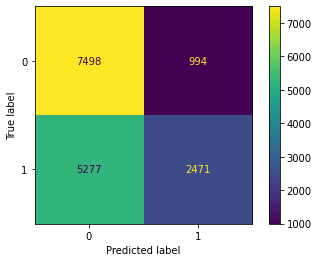

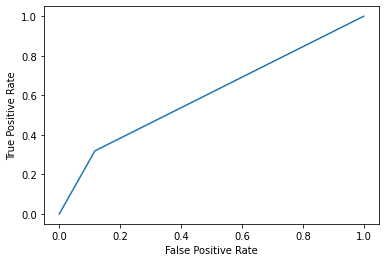

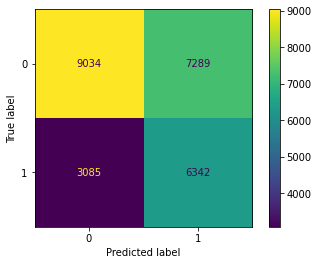

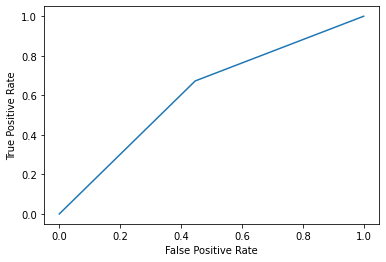

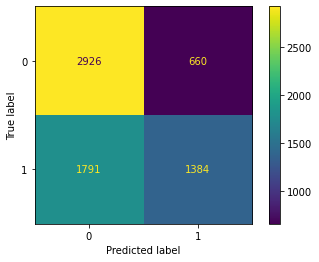

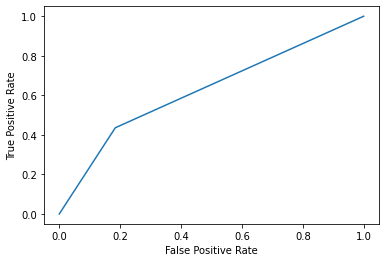

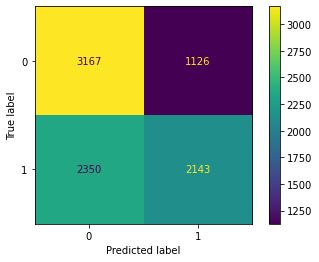

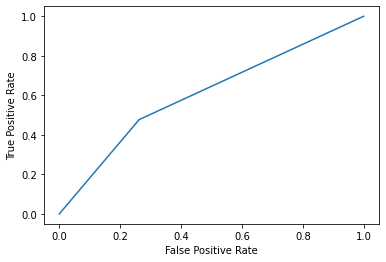

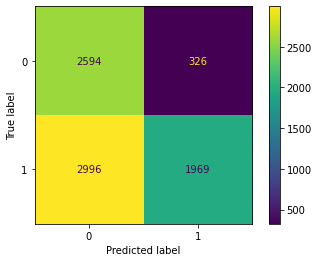

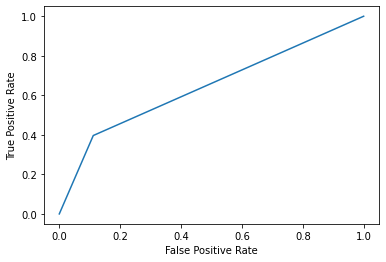

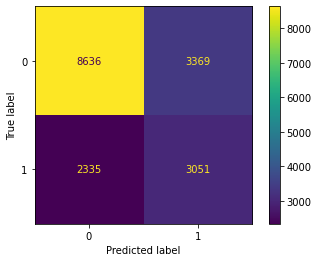

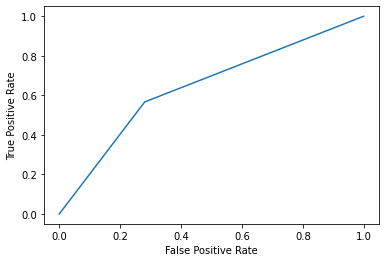

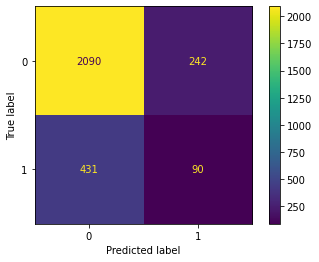

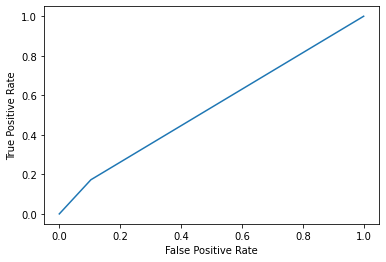

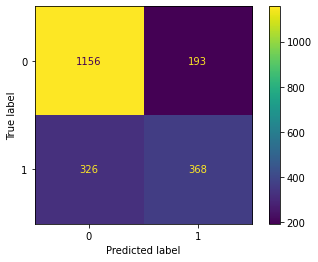

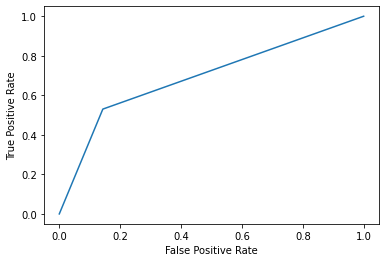

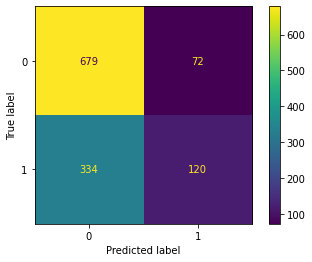

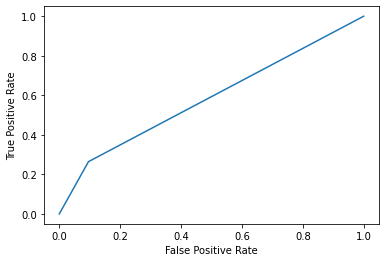

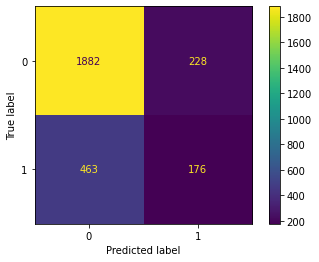

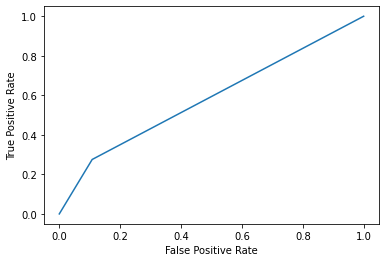

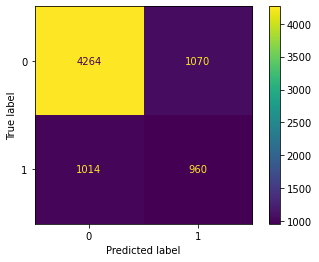

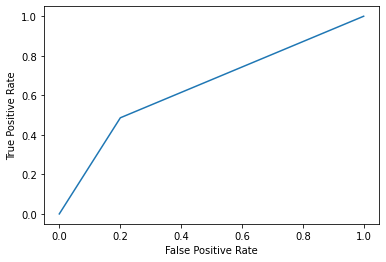

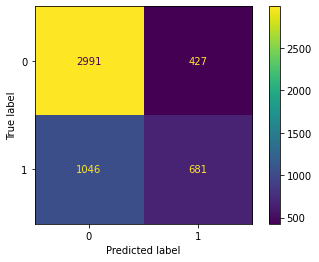

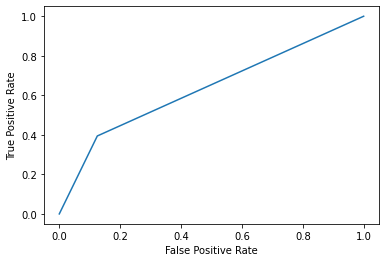

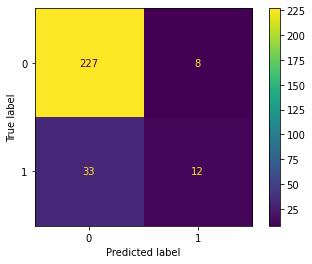

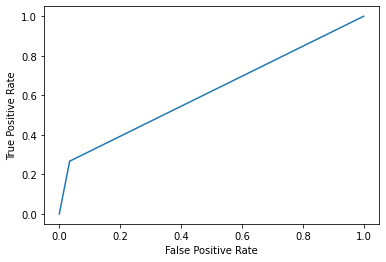

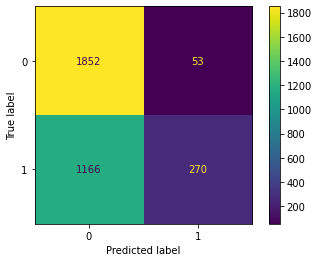

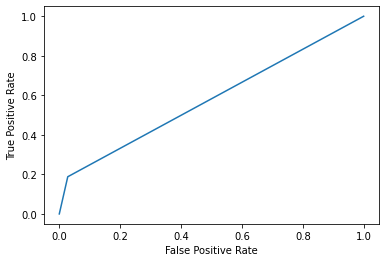

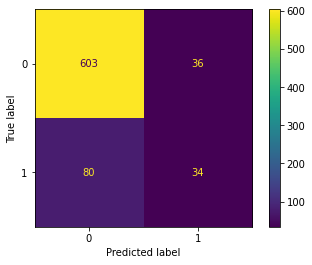

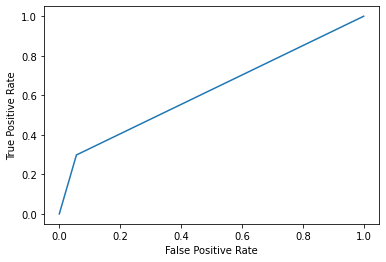

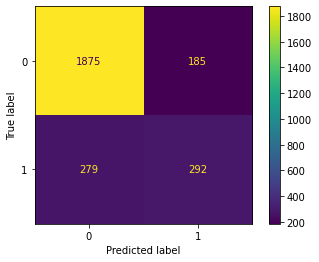

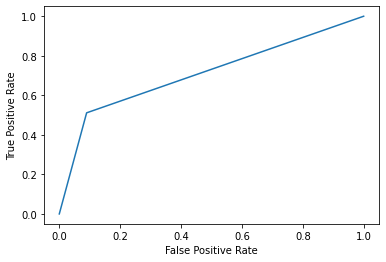

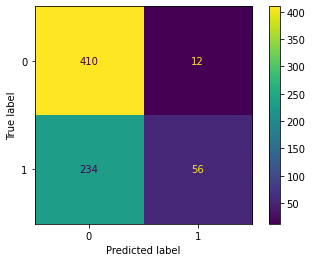

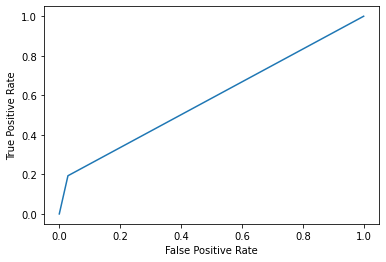

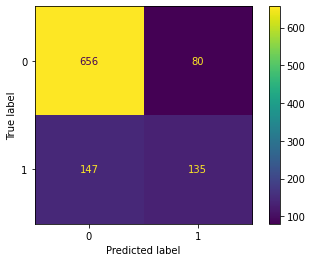

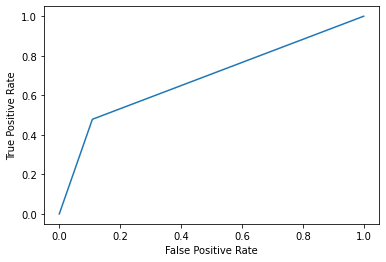

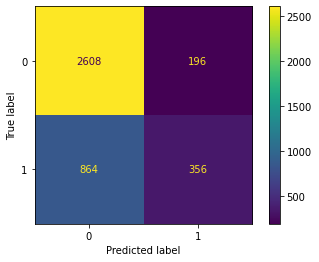

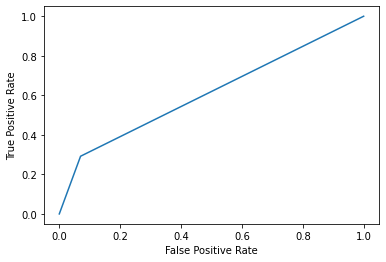

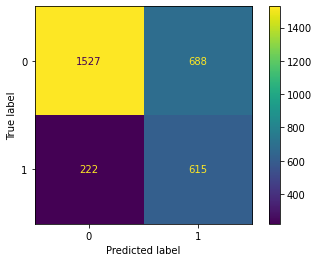

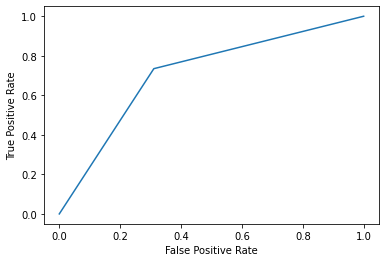

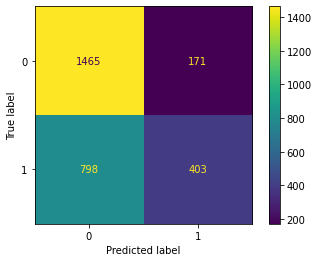

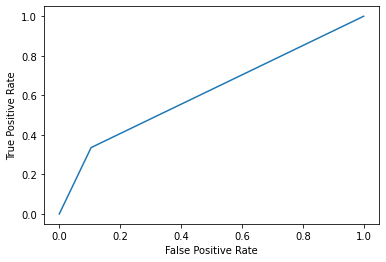

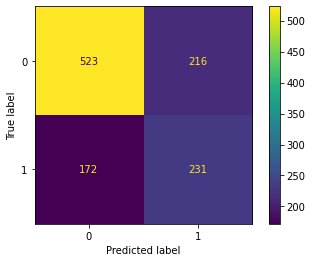

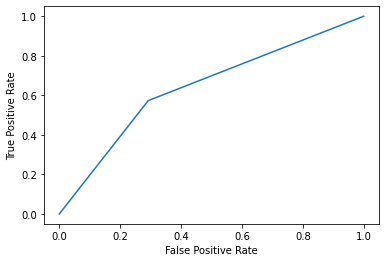

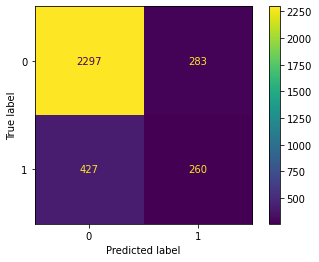

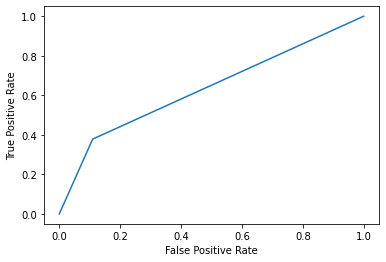

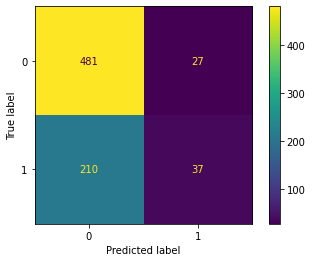

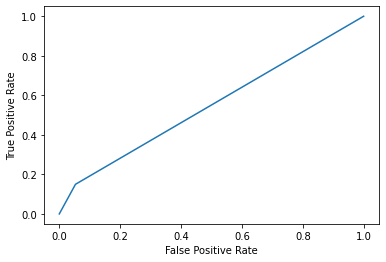

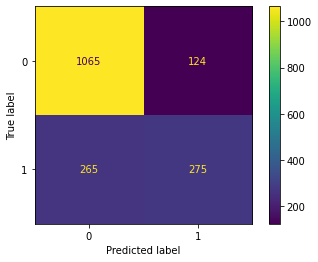

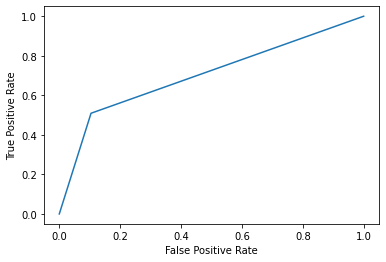

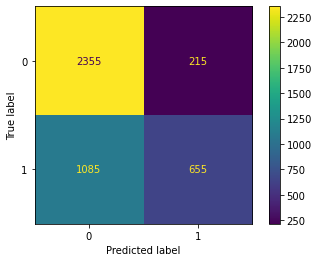

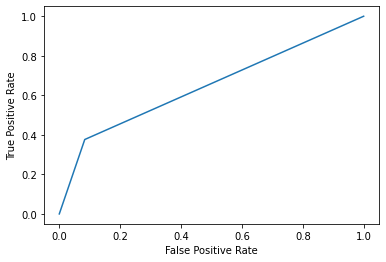

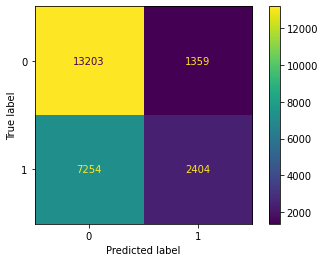

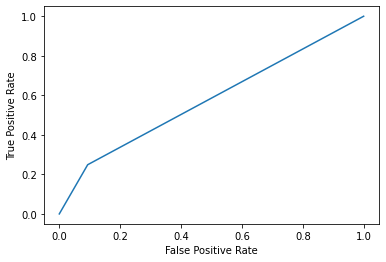

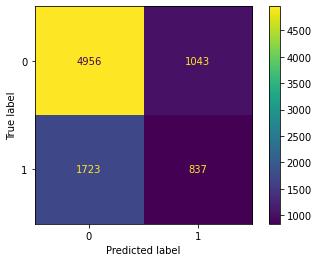

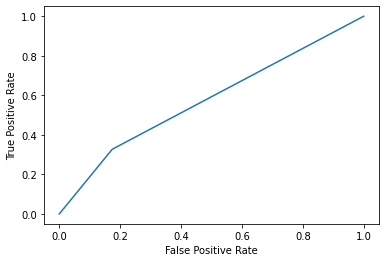

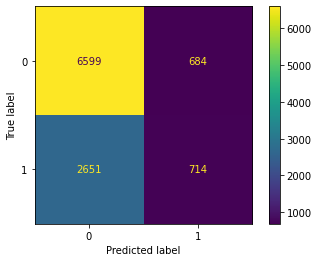

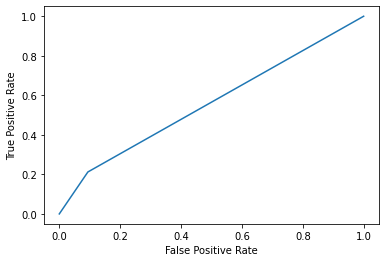

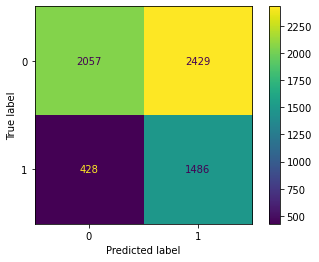

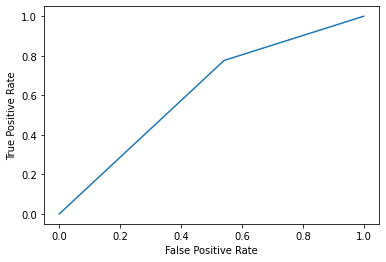

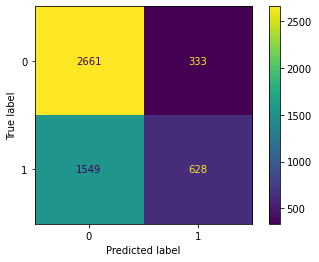

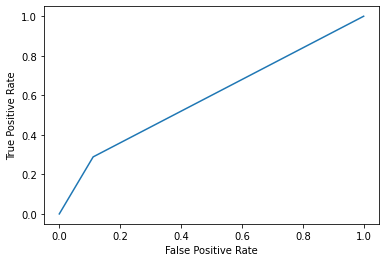

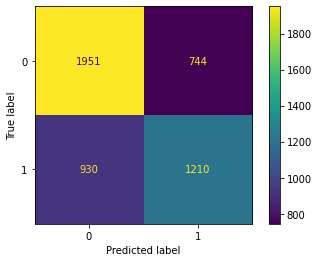

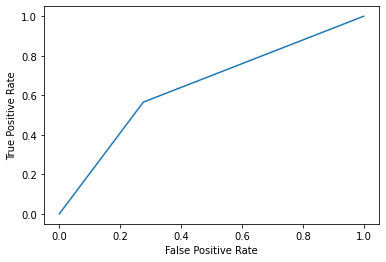

In [14]:
df = pd.read_csv("data_for_analysis.csv")
df = df.drop(columns=["TIME"])


device = torch.device('cpu')
df['FILE_BUGGY'] = df['FILE_BUGGY'].astype(int)
project_list = df['PROJECT'].unique().tolist()

X = df.iloc[:, 0:-1] #dataset senza label predizione
y = df.iloc[:, -1] #valori da pred.

f1_scores = []
auc_roc_scores = []
for project in project_list:
  train = df[df['PROJECT'] != project]
  test = df[df['PROJECT'] == project]
  train = train.drop(columns=["PROJECT"])
  test = test.drop(columns=["PROJECT"])
  X_train = train.iloc[:, 0:-1]
  y_train = train.iloc[:, -1]
  X_test = test.iloc[:, 0:-1]
  y_test = test.iloc[:, -1]
 
  EPOCHS = 50
  BATCH_SIZE = 1024
  LEARNING_RATE = 0.001

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  print(type(y_train.to_numpy))
  #Crea tensore di training
  torch.FloatTensor(X_train)
  torch.FloatTensor(y_train.to_numpy())

  #Crea tensore di test
  train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train.to_numpy()))
  test_data = TestData(torch.FloatTensor(X_test))
  train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
  test_loader = DataLoader(dataset=test_data, batch_size=1)
  model = BinaryClassificator(24, 13,  1)
  print(model)
  criterion = nn.BCEWithLogitsLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)


  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = model.to(device)
  print(device)
  model.train()
  for epoch in range(EPOCHS):  

    running_loss = 0.0
    running_acc = 0.0
    for X_batch, y_batch in train_loader:
        
        #manda i batch al device 
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        #azzera gradiente
        optimizer.zero_grad()
        #predict
        y_pred = model(X_batch)
        #calcola loss e accuracy
        #y_pred_test = torch.sigmoid(y_pred)
       
        #y_pred_test = [1 if x>=.5 else 0 for x in y_pred_test]
      

        #print(y_batch.shape)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = accuracy(y_pred, y_batch.unsqueeze(1))
        #backpropagation della loss
        loss.backward()
        #ottimizzazione
        optimizer.step()
        
        #somma della loss e dell'accuracy per il batch
        running_loss += loss.item()
        running_acc += acc.item()                   
        
    
    print(f'Epoch {epoch}: | Loss: {running_loss/len(train_loader):.5f} | Acc: {running_acc/len(train_loader):.3f}')
  y_pred_list = []
  with torch.no_grad():
      for X_batch in test_loader:
          X_batch = X_batch.to(device)
          y_test_pred = model(X_batch)
          y_test_pred = torch.sigmoid(y_test_pred)
          y_pred_tag = torch.round(y_test_pred)
          y_pred_list.append(y_pred_tag.cpu().numpy())

  y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
  print(classification_report(y_test, y_pred_list))
  conf_mat = confusion_matrix(y_test, y_pred_list)
  print("SKMetrics F1 score: ")
  print(skmetrics.f1_score(y_test, y_pred_list))

  skmetrics.ConfusionMatrixDisplay(conf_mat).plot()
  fpr, tpr, _ = skmetrics.roc_curve(y_test, y_pred_list)
  roc_display = skmetrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
  auc_roc_score = skmetrics.roc_auc_score(y_test, y_pred_list)
  print("AUC-ROC score: ")
  print(auc_roc_score)
  f1_scores.append(skmetrics.f1_score(y_test, y_pred_list))
  auc_roc_scores.append(auc_roc_score)

with open(r'auc_roc', 'w') as fp:
  for item in auc_roc_scores:
      # write each item on a new line
      fp.write("%s\n" % item)
  print('Done')
with open(r'f1', 'w') as fp:
  for item in f1_scores:
      # write each item on a new line
      fp.write("%s\n" % item)
  print('Done')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb5f0ab5050>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb5f0ab5ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb5f0b2fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb5f0abb5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5f0abbb10>],
 'means': []}

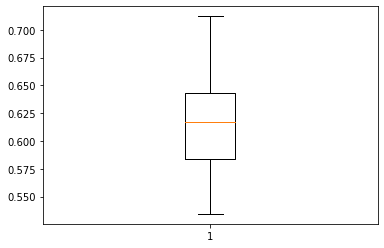

In [18]:
#matplotlib.pyplot.boxplot(f1_scores, notch=None, vert=None, patch_artist=None, widths=None)
matplotlib.pyplot.boxplot(auc_roc_scores, notch=None, vert=None, patch_artist=None, widths=None)